# Customer Analytics

### Customer analytics is a process by which data from customer behavior is used to help make key business decisions via market segmentation and predictive analytics. This information is used by businesses for direct marketing, site selection, and customer relationship management.

## Case study Background

#### An International E-Commerce company(Electronic goods) wants to use some of the most advanced machine learning techniques to analyse their customers with respect to their services and some important customer success matrix.

#### They also have future expansion plans to India.

#### They have some specific key insights to be found out from their existing customer database.

#### • The company operates in various states of USA, but the customer data is only specific to one state in the USA.
#### • The warehouse is located on the eastern part whereas, the state to which shipments are delivered is at the western part of USA.

#### As a Data Scientist, they want you to build a model to predict if the shipments are or will reach on time or not.

#### For this, they want you to use various Logit/Probabilistic techniques with the most accurate model. The main models they want you to build and compare the accuracy are:

#### 1. Logistic Regression
#### 2. Support Vector Machines
#### 3. Random Forest
#### 4. XgBoost or any other boosting technique
#### 5. Neural Network.

### Data Information : (Important)

##### ID - Id number of the customer
##### Warehouse_block - The company has a big warehouse which is divided in various blocks such as A,B,C,D and so on.
##### Mode_of_Shipment - The company ships the products by different modes of transport such as ship, air and road
##### Customer_care_calls - this variable indicates the number of calls made for enquiry of the shipment.(Sometimes customer make too many calls, hence the company wants to know that are these customers unknowingly favoured.
##### Customer_rating - The company has rated every customer on various parameters, 1 being the lowest (Worst), 5 being highest (Best)
##### Cost_of_the_Product - It is the cost of the product in USD
##### Prior_purchases - This variable indicates the number of prior purchases
##### Product_importance - The company has categorised the products in the range of high, medium and low based on various parameters
##### Gender - Male or female
##### Discount_offered - it is the percentage of discount offered on that specific product.
##### Weight_in_gms - It is the weight in grams
##### Reached.on.Time_Y.N - It is the Y variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time

In [1]:
pwd

'C:\\Users\\BLAZIN\\Python Projects\\Customer Analytics'

In [2]:
# Change the path
import os
os.chdir('E:\\IMS Course Content\\Course Content\\Data Science Term 3\\Project')

In [3]:
pwd

'E:\\IMS Course Content\\Course Content\\Data Science Term 3\\Project'

In [4]:
#import numpy and pandas
import numpy as np
import pandas as pd

In [5]:
# Load the Train and test csv
df_train = pd.read_csv('Customer_Train.csv', index_col=None)
df_test = pd.read_csv('Customer_Test.csv', index_col=None)

#### Exploratory Data Analysis

In [6]:
df_train.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [7]:
df_test.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,A,Road,3,4,168,3,low,M,5,1841,NaN
1,2,B,Road,5,3,159,2,low,F,58,1990,NaN
2,3,C,Road,2,2,282,3,medium,F,42,3193,NaN
3,4,F,Road,4,3,278,4,high,M,37,3248,NaN
4,5,D,Road,6,4,256,5,low,F,6,3149,NaN


In [8]:
df_train.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
ID                     10999 non-null int64
Warehouse_block        10999 non-null object
Mode_of_Shipment       10999 non-null object
Customer_care_calls    10999 non-null int64
Customer_rating        10999 non-null int64
Cost_of_the_Product    10999 non-null int64
Prior_purchases        10999 non-null int64
Product_importance     10999 non-null object
Gender                 10999 non-null object
Discount_offered       10999 non-null int64
Weight_in_gms          10999 non-null int64
Reached.on.Time_Y.N    10999 non-null int64
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [10]:
df_train.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [11]:
df_train.shape

(10999, 12)

In [12]:
df_test.shape

(3993, 12)

##### Cleaning the Category

In [13]:
#Dropping the ID Column
df_train = df_train.drop(columns='ID', axis=1)
df_test = df_test.drop(columns='ID', axis=1)

df_train.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [14]:
#Rename the columns
df_train = df_train.rename(index=str, columns={"Warehouse_block":"Warehouse", "Mode_of_Shipment":"Mode", "Customer_care_calls":"Cust_Calls", 
                                               "Customer_rating":"Cust_Rating", "Cost_of_the_Product":"Prod_Cost", "Prior_purchases":"Prior_Purchase",
                                              "Product_importance":"Prod_Imp", "Discount_offered":"Discount", "Weight_in_gms":"Weight", 
                                               "Reached.on.Time_Y.N":"Reached", "Gender":"Sex"})
df_test = df_test.rename(index=str, columns={"Warehouse_block":"Warehouse", "Mode_of_Shipment":"Mode", "Customer_care_calls":"Cust_Calls", 
                                               "Customer_rating":"Cust_Rating", "Cost_of_the_Product":"Prod_Cost", "Prior_purchases":"Prior_Purchase",
                                              "Product_importance":"Prod_Imp", "Discount_offered":"Discount", "Weight_in_gms":"Weight", 
                                               "Reached.on.Time_Y.N":"Reached", "Gender":"Sex"})

In [15]:
#Head of Train Data
df_train.head()

,Warehouse,Mode,Cust_Calls,Cust_Rating,Prod_Cost,Prior_Purchase,Prod_Imp,Sex,Discount,Weight,Reached
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [16]:
#Head of Test Data
df_test.head()

,Warehouse,Mode,Cust_Calls,Cust_Rating,Prod_Cost,Prior_Purchase,Prod_Imp,Sex,Discount,Weight,Reached
0,A,Road,3,4,168,3,low,M,5,1841,NaN
1,B,Road,5,3,159,2,low,F,58,1990,NaN
2,C,Road,2,2,282,3,medium,F,42,3193,NaN
3,F,Road,4,3,278,4,high,M,37,3248,NaN
4,D,Road,6,4,256,5,low,F,6,3149,NaN


In [17]:
#To capitalize the first character in the Product Importance column
df_train['Prod_Imp'] = df_train['Prod_Imp'].str.capitalize()
df_test['Prod_Imp'] = df_test['Prod_Imp'].str.capitalize()

df_train.head()

,Warehouse,Mode,Cust_Calls,Cust_Rating,Prod_Cost,Prior_Purchase,Prod_Imp,Sex,Discount,Weight,Reached
0,D,Flight,4,2,177,3,Low,F,44,1233,1
1,F,Flight,4,5,216,2,Low,M,59,3088,1
2,A,Flight,2,2,183,4,Low,M,48,3374,1
3,B,Flight,3,3,176,4,Medium,M,10,1177,1
4,C,Flight,2,2,184,3,Medium,F,46,2484,1


In [18]:
#To change the value of the Reached on Time column to Y and N
df_train['Reached'] = df_train['Reached'].replace({1: 'N', 0: 'Y'})

df_train.head()

,Warehouse,Mode,Cust_Calls,Cust_Rating,Prod_Cost,Prior_Purchase,Prod_Imp,Sex,Discount,Weight,Reached
0,D,Flight,4,2,177,3,Low,F,44,1233,N
1,F,Flight,4,5,216,2,Low,M,59,3088,N
2,A,Flight,2,2,183,4,Low,M,48,3374,N
3,B,Flight,3,3,176,4,Medium,M,10,1177,N
4,C,Flight,2,2,184,3,Medium,F,46,2484,N


### Data Insight and Visualisation

In [19]:
#Loading the Package
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Feature Count

In [20]:
#Counting no of Product which has reached
df_train['Reached'].value_counts()

N    6563
Y    4436
Name: Reached, dtype: int64

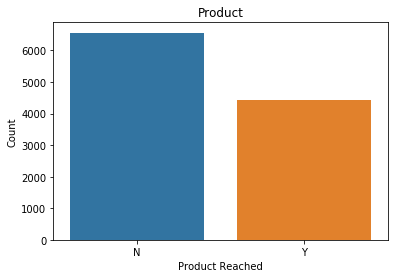

In [21]:
#Counting no of Product which has reached
sns.countplot(x='Reached',data=df_train)
plt.xlabel("Product Reached")
plt.ylabel("Count")
plt.title("Product")
plt.show()

In [22]:
#Counting no of Warehouse the product has been dispatched
df_train['Warehouse'].value_counts()

F    3666
D    1834
B    1833
A    1833
C    1833
Name: Warehouse, dtype: int64

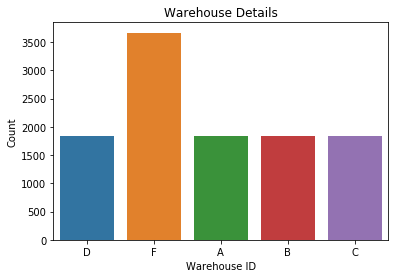

In [23]:
#Counting no of Warehouse the product has been dispatched
sns.countplot(x='Warehouse',data=df_train)
plt.xlabel("Warehouse ID")
plt.ylabel("Count")
plt.title("Warehouse Details")
plt.show()

In [24]:
#Counting no of Mode of transport used for delivering the product
df_train['Mode'].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode, dtype: int64

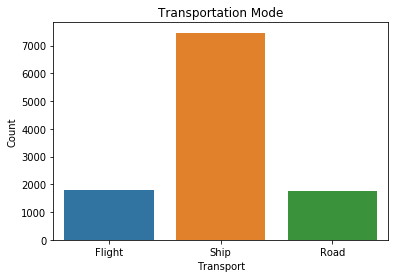

In [25]:
#Counting no of Mode of transport used for delivering the product
sns.countplot(x='Mode',data=df_train)
plt.xlabel("Transport")
plt.ylabel("Count")
plt.title("Transportation Mode")
plt.show()

In [26]:
#Counting no of Calls the Customer for the product
df_train['Cust_Calls'].value_counts()

4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Cust_Calls, dtype: int64

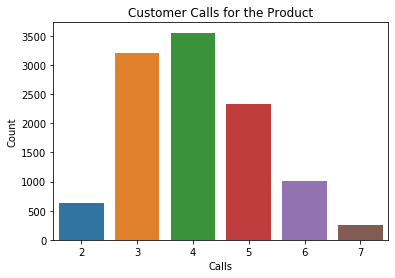

In [27]:
#Counting no of Calls the Customer for the product
sns.countplot(x='Cust_Calls',data=df_train)
plt.xlabel("Calls")
plt.ylabel("Count")
plt.title("Customer Calls for the Product")
plt.show()

In [28]:
#Counting no of Rating given for the customer by the company
df_train['Cust_Rating'].value_counts()

3    2239
1    2235
4    2189
5    2171
2    2165
Name: Cust_Rating, dtype: int64

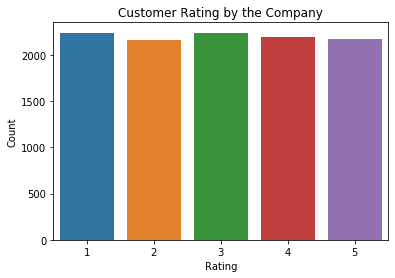

In [29]:
#Counting no of Rating given for the customer by the company
sns.countplot(x='Cust_Rating',data=df_train)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Customer Rating by the Company")
plt.show()

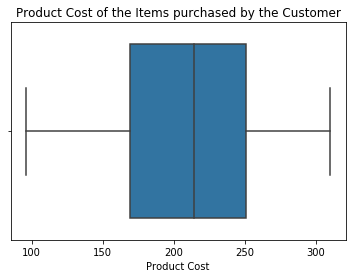

In [30]:
#Product Cost of the Product Items by the Customer
sns.boxplot(x=df_train['Prod_Cost'])
plt.xlabel("Product Cost")
plt.title("Product Cost of the Items purchased by the Customer")
plt.show()

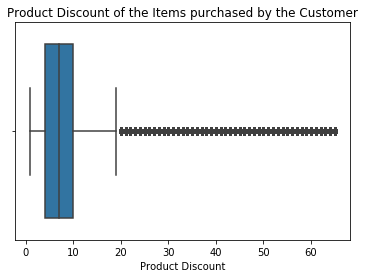

In [31]:
#Product Discount of the Product Items by the Customer
sns.boxplot(x=df_train['Discount'])
plt.xlabel("Product Discount")
plt.title("Product Discount of the Items purchased by the Customer")
plt.show()

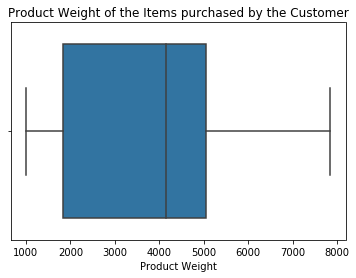

In [32]:
#Product Weight of the Product Items by the Customer
sns.boxplot(x=df_train['Weight'])
plt.xlabel("Product Weight")
plt.title("Product Weight of the Items purchased by the Customer")
plt.show()

In [33]:
#Counting no of Prior Purchase done by the customer
df_train['Prior_Purchase'].value_counts()

3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: Prior_Purchase, dtype: int64

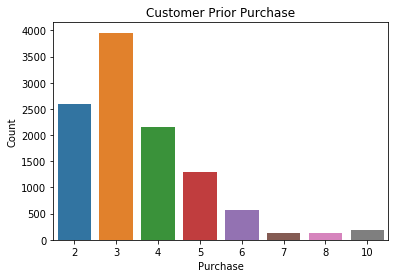

In [34]:
#Counting no of Prior Purchase done by the customer
sns.countplot(x='Prior_Purchase',data=df_train)
plt.xlabel("Purchase")
plt.ylabel("Count")
plt.title("Customer Prior Purchase")
plt.show()

In [35]:
#Counting no of Importance for the Product
df_train['Prod_Imp'].value_counts()

Low       5297
Medium    4754
High       948
Name: Prod_Imp, dtype: int64

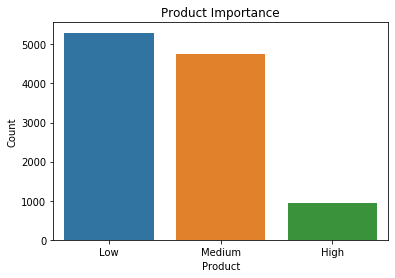

In [36]:
#Counting no of Importance for the Product
sns.countplot(x='Prod_Imp',data=df_train)
plt.xlabel("Product")
plt.ylabel("Count")
plt.title("Product Importance")
plt.show()

In [37]:
#Counting no of Gender of the Customer
df_train['Sex'].value_counts()

F    5545
M    5454
Name: Sex, dtype: int64

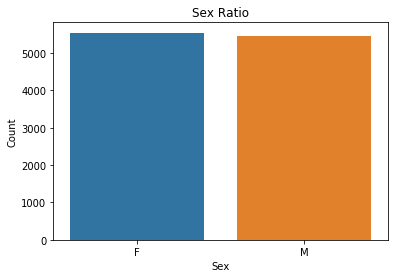

In [38]:
#Counting no of Gender of the Customer
sns.countplot(x='Sex',data=df_train)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Sex Ratio")
plt.show()

## Problem Statement 2

#### They also want to know, if their shipments are reaching on time to their best customers who have a :

#### 1. Good customer rating.
#### 2. Good customer score.
#### 3. Make recurring orders.
#### 4. Highest payment buyers.

#### Data Insight based on the Reached Column

##### Based on Warehouse

In [39]:
#Counting no of Product which has reached the warehouse
grouped = df_train.groupby(['Reached','Warehouse'])
grouped.size()

Reached  Warehouse
N        A            1075
         B            1104
         C            1094
         D            1096
         F            2194
Y        A             758
         B             729
         C             739
         D             738
         F            1472
dtype: int64

In [40]:
Warehouse_Reached_table = pd.crosstab(index=df_train["Warehouse"], columns=df_train["Reached"])

Warehouse_Reached_table

Reached,N,Y
Warehouse,,
A,1075,758
B,1104,729
C,1094,739
D,1096,738
F,2194,1472


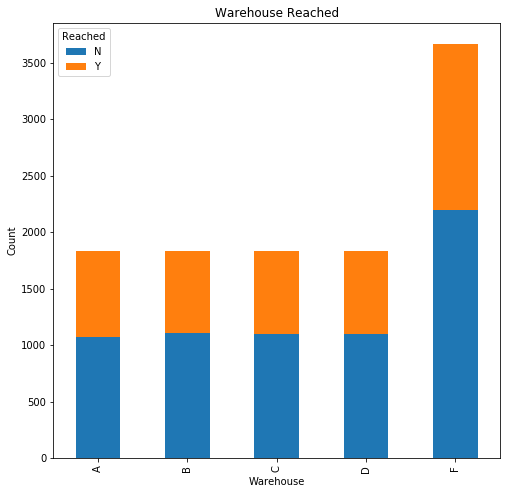

In [41]:
Warehouse_Reached_table.plot(kind="bar", figsize=(8,8), stacked=True)
plt.xlabel("Warehouse")
plt.ylabel("Count")
plt.title("Warehouse Reached")
plt.show()

##### Based on Mode

In [42]:
#Mode the Product has reached the customer
grouped = df_train.groupby(['Reached','Mode'])
grouped.size()

Reached  Mode  
N        Flight    1069
         Road      1035
         Ship      4459
Y        Flight     708
         Road       725
         Ship      3003
dtype: int64

In [43]:
Mode_Reached_table = pd.crosstab(index=df_train["Mode"], columns=df_train["Reached"])

Mode_Reached_table

Reached,N,Y
Mode,,
Flight,1069,708
Road,1035,725
Ship,4459,3003


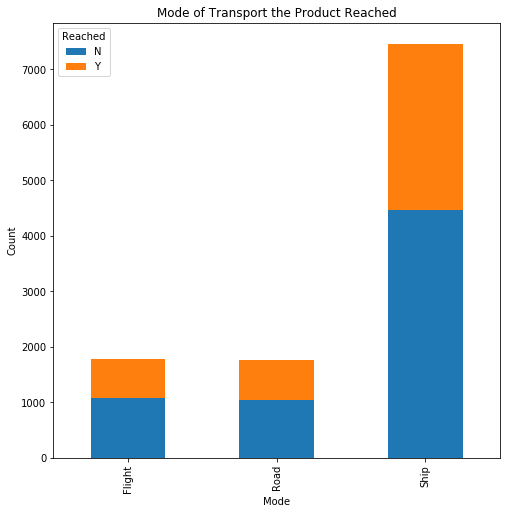

In [44]:
Mode_Reached_table.plot(kind="bar", figsize=(8,8), stacked=True)
plt.xlabel("Mode")
plt.ylabel("Count")
plt.title("Mode of Transport the Product Reached")
plt.show()

##### Based on Customer Call to the Company

In [45]:
#Counting no of Customer Call to the Company based on the Product if Reached
grouped = df_train.groupby(['Reached','Cust_Calls'])
grouped.size()

Reached  Cust_Calls
N        2              416
         3             2011
         4             2126
         5             1360
         6              523
         7              127
Y        2              222
         3             1206
         4             1431
         5              968
         6              490
         7              119
dtype: int64

In [46]:
CustCall_Reached_table = pd.crosstab(index=df_train["Cust_Calls"], columns=df_train["Reached"])

CustCall_Reached_table

Reached,N,Y
Cust_Calls,,
2,416,222
3,2011,1206
4,2126,1431
5,1360,968
6,523,490
7,127,119


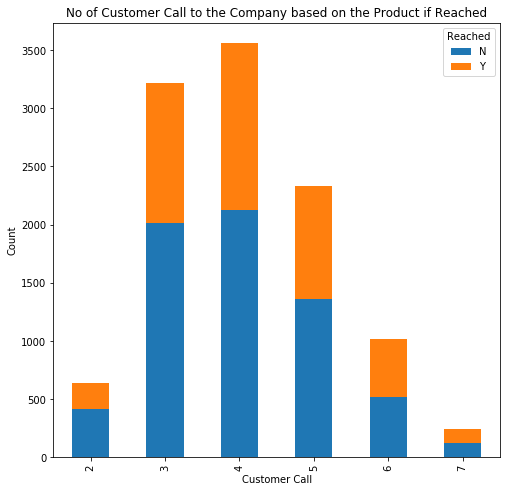

In [47]:
CustCall_Reached_table.plot(kind="bar", figsize=(8,8), stacked=True)
plt.xlabel("Customer Call")
plt.ylabel("Count")
plt.title("No of Customer Call to the Company based on the Product if Reached")
plt.show()

##### Based on Company Rating of the Customer if the product has reached

In [48]:
#Counting Based on Company Rating of the Customer if the product has reached
grouped = df_train.groupby(['Reached','Cust_Rating'])
grouped.size()

Reached  Cust_Rating
N        1              1313
         2              1273
         3              1357
         4              1303
         5              1317
Y        1               922
         2               892
         3               882
         4               886
         5               854
dtype: int64

In [49]:
CustRating_Reached_table = pd.crosstab(index=df_train["Cust_Rating"], columns=df_train["Reached"])

CustRating_Reached_table

Reached,N,Y
Cust_Rating,,
1,1313,922
2,1273,892
3,1357,882
4,1303,886
5,1317,854


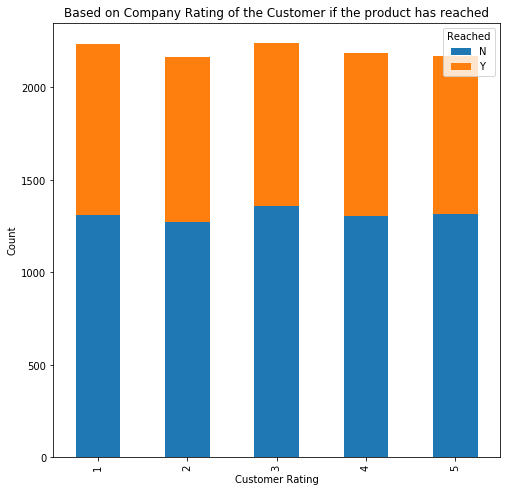

In [50]:
CustRating_Reached_table.plot(kind="bar", figsize=(8,8), stacked=True)
plt.xlabel("Customer Rating")
plt.ylabel("Count")
plt.title("Based on Company Rating of the Customer if the product has reached")
plt.show()

##### Based on Customer Prior Purchase if the product has reached

In [51]:
#Counting Based on Customer Prior Purchase if the product has reached
grouped = df_train.groupby(['Reached','Prior_Purchase'])
grouped.size()

Reached  Prior_Purchase
N        2                 1625
         3                 2534
         4                 1171
         5                  642
         6                  314
         7                   92
         8                   83
         10                 102
Y        2                  974
         3                 1421
         4                  984
         5                  645
         6                  247
         7                   44
         8                   45
         10                  76
dtype: int64

In [52]:
PriorPurch_Reached_table = pd.crosstab(index=df_train["Prior_Purchase"], columns=df_train["Reached"])

PriorPurch_Reached_table

Reached,N,Y
Prior_Purchase,,
2,1625,974
3,2534,1421
4,1171,984
5,642,645
6,314,247
7,92,44
8,83,45
10,102,76


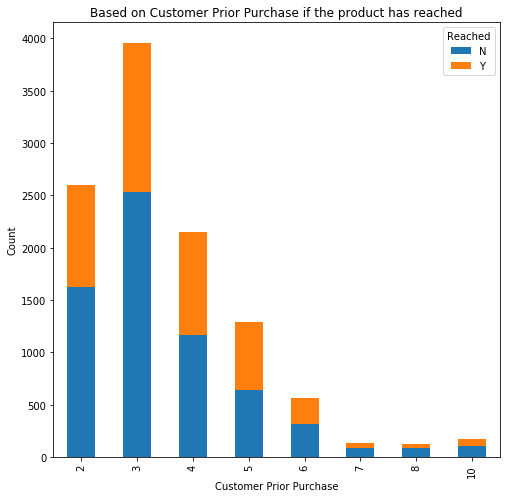

In [53]:
PriorPurch_Reached_table.plot(kind="bar", figsize=(8,8), stacked=True)
plt.xlabel("Customer Prior Purchase")
plt.ylabel("Count")
plt.title("Based on Customer Prior Purchase if the product has reached")
plt.show()

##### Based on Product Importance if the product has reached

In [54]:
#Counting Based on Product Importance if the product has reached
grouped = df_train.groupby(['Reached','Prod_Imp'])
grouped.size()

Reached  Prod_Imp
N        High         616
         Low         3140
         Medium      2807
Y        High         332
         Low         2157
         Medium      1947
dtype: int64

In [55]:
ProdImp_Reached_table = pd.crosstab(index=df_train["Prod_Imp"], columns=df_train["Reached"])

ProdImp_Reached_table

Reached,N,Y
Prod_Imp,,
High,616,332
Low,3140,2157
Medium,2807,1947


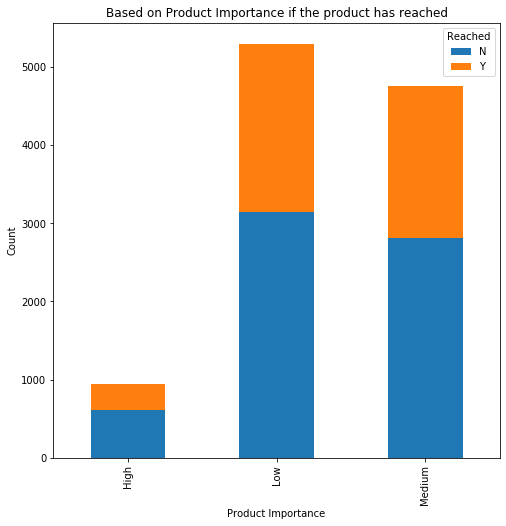

In [56]:
ProdImp_Reached_table.plot(kind="bar", figsize=(8,8), stacked=True)
plt.xlabel("Product Importance")
plt.ylabel("Count")
plt.title("Based on Product Importance if the product has reached")
plt.show()

##### Based on Sex if the product has reached

In [57]:
#Counting Based on Sex if the product has reached
grouped = df_train.groupby(['Reached','Sex'])
grouped.size()

Reached  Sex
N        F      3296
         M      3267
Y        F      2249
         M      2187
dtype: int64

In [58]:
Sex_Reached_table = pd.crosstab(index=df_train["Sex"], columns=df_train["Reached"])

Sex_Reached_table

Reached,N,Y
Sex,,
F,3296,2249
M,3267,2187


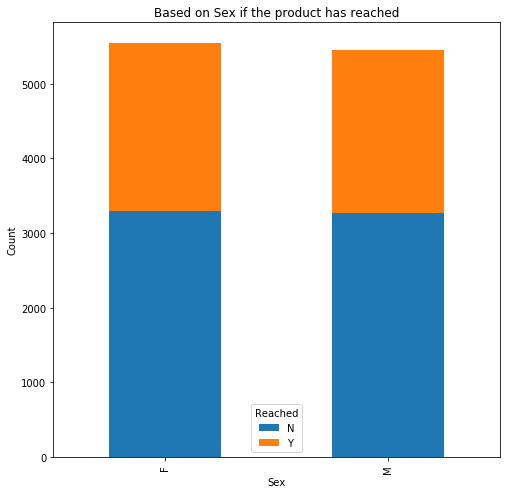

In [59]:
Sex_Reached_table.plot(kind="bar", figsize=(8,8), stacked=True)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Based on Sex if the product has reached")
plt.show()

##### Based on Product Price Range if the product has reached

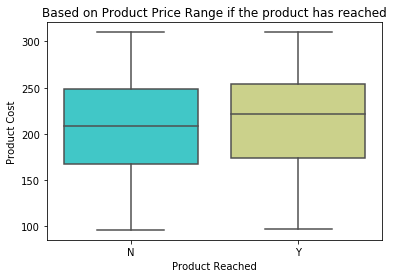

In [60]:
sns.boxplot(x='Reached',y='Prod_Cost',data=df_train,palette='rainbow')
plt.xlabel("Product Reached")
plt.ylabel("Product Cost")
plt.title("Based on Product Price Range if the product has reached")
plt.show()

##### Based on Product Discount Range if the product has reached

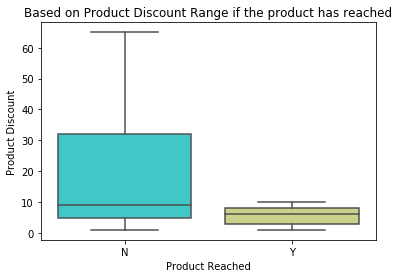

In [61]:
sns.boxplot(x='Reached',y='Discount',data=df_train,palette='rainbow')
plt.xlabel("Product Reached")
plt.ylabel("Product Discount")
plt.title("Based on Product Discount Range if the product has reached")
plt.show()

##### Based on Product Weight Range if the product has reached

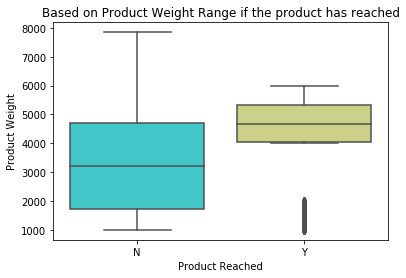

In [62]:
sns.boxplot(x='Reached',y='Weight',data=df_train,palette='rainbow')
plt.xlabel("Product Reached")
plt.ylabel("Product Weight")
plt.title("Based on Product Weight Range if the product has reached")
plt.show()

#### Outlier Detection

##### Product Discount has Outliers

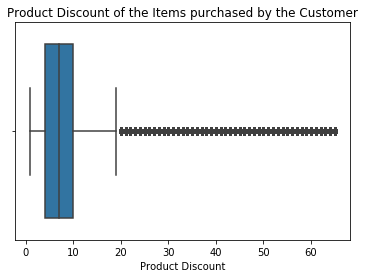

In [63]:
#Product Discount of the Product Items by the Customer
sns.boxplot(x=df_train['Discount'])
plt.xlabel("Product Discount")
plt.title("Product Discount of the Items purchased by the Customer")
plt.show()

##### Values range of the Discount Variable is between 0-65%. Removing Outliers will affect the model as the test data also has Outliers between the same range.

### Feature Engineering

#### Encoding the data using Label Encoding and One Hot Encoding

In [64]:
import sklearn

In [65]:
#import the Label Encoder Package
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [66]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10999 entries, 0 to 10998
Data columns (total 11 columns):
Warehouse         10999 non-null object
Mode              10999 non-null object
Cust_Calls        10999 non-null int64
Cust_Rating       10999 non-null int64
Prod_Cost         10999 non-null int64
Prior_Purchase    10999 non-null int64
Prod_Imp          10999 non-null object
Sex               10999 non-null object
Discount          10999 non-null int64
Weight            10999 non-null int64
Reached           10999 non-null object
dtypes: int64(6), object(5)
memory usage: 1.3+ MB


In [67]:
df_train.head()

,Warehouse,Mode,Cust_Calls,Cust_Rating,Prod_Cost,Prior_Purchase,Prod_Imp,Sex,Discount,Weight,Reached
0,D,Flight,4,2,177,3,Low,F,44,1233,N
1,F,Flight,4,5,216,2,Low,M,59,3088,N
2,A,Flight,2,2,183,4,Low,M,48,3374,N
3,B,Flight,3,3,176,4,Medium,M,10,1177,N
4,C,Flight,2,2,184,3,Medium,F,46,2484,N


In [68]:
df_test.head()

,Warehouse,Mode,Cust_Calls,Cust_Rating,Prod_Cost,Prior_Purchase,Prod_Imp,Sex,Discount,Weight,Reached
0,A,Road,3,4,168,3,Low,M,5,1841,NaN
1,B,Road,5,3,159,2,Low,F,58,1990,NaN
2,C,Road,2,2,282,3,Medium,F,42,3193,NaN
3,F,Road,4,3,278,4,High,M,37,3248,NaN
4,D,Road,6,4,256,5,Low,F,6,3149,NaN


##### One Hot Encoding for the Warehouse Column

In [69]:
#Creating Dummy Varibles
warehouse = pd.get_dummies(df_train['Warehouse'], prefix='Warehouse')
#Concatination the Dummy variable to the Dataframe
df_train = pd.concat([df_train,warehouse], axis=1)
#Dropping the Feature
df_train = df_train.drop(['Warehouse'], axis=1)

In [70]:
df_train.head()

,Mode,Cust_Calls,Cust_Rating,Prod_Cost,Prior_Purchase,Prod_Imp,Sex,Discount,Weight,Reached,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F
0,Flight,4,2,177,3,Low,F,44,1233,N,0,0,0,1,0
1,Flight,4,5,216,2,Low,M,59,3088,N,0,0,0,0,1
2,Flight,2,2,183,4,Low,M,48,3374,N,1,0,0,0,0
3,Flight,3,3,176,4,Medium,M,10,1177,N,0,1,0,0,0
4,Flight,2,2,184,3,Medium,F,46,2484,N,0,0,1,0,0


In [71]:
#Creating Dummy Varibles
warehouse = pd.get_dummies(df_test['Warehouse'], prefix='Warehouse')
#Concatination the Dummy variable to the Dataframe
df_test = pd.concat([df_test,warehouse], axis=1)
#Dropping the Feature
df_test = df_test.drop(['Warehouse'], axis=1)

In [72]:
df_test.head()

,Mode,Cust_Calls,Cust_Rating,Prod_Cost,Prior_Purchase,Prod_Imp,Sex,Discount,Weight,Reached,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F
0,Road,3,4,168,3,Low,M,5,1841,NaN,1,0,0,0,0
1,Road,5,3,159,2,Low,F,58,1990,NaN,0,1,0,0,0
2,Road,2,2,282,3,Medium,F,42,3193,NaN,0,0,1,0,0
3,Road,4,3,278,4,High,M,37,3248,NaN,0,0,0,0,1
4,Road,6,4,256,5,Low,F,6,3149,NaN,0,0,0,1,0


##### One Hot Encoding for the Mode Column

In [73]:
#Creating Dummy Varibles
mode = pd.get_dummies(df_train['Mode'], prefix='Mode')
#Concatination the Dummy variable to the Dataframe
df_train = pd.concat([df_train,mode], axis=1)
#Dropping the Feature
df_train = df_train.drop(['Mode'], axis=1)

In [74]:
df_train.head()

,Cust_Calls,Cust_Rating,Prod_Cost,Prior_Purchase,Prod_Imp,Sex,Discount,Weight,Reached,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Mode_Flight,Mode_Road,Mode_Ship
0,4,2,177,3,Low,F,44,1233,N,0,0,0,1,0,1,0,0
1,4,5,216,2,Low,M,59,3088,N,0,0,0,0,1,1,0,0
2,2,2,183,4,Low,M,48,3374,N,1,0,0,0,0,1,0,0
3,3,3,176,4,Medium,M,10,1177,N,0,1,0,0,0,1,0,0
4,2,2,184,3,Medium,F,46,2484,N,0,0,1,0,0,1,0,0


In [75]:
#Creating Dummy Varibles
mode = pd.get_dummies(df_test['Mode'], prefix='Mode')
#Concatination the Dummy variable to the Dataframe
df_test = pd.concat([df_test,mode], axis=1)
#Dropping the Feature
df_test = df_test.drop(['Mode'], axis=1)

In [76]:
df_test.head()

,Cust_Calls,Cust_Rating,Prod_Cost,Prior_Purchase,Prod_Imp,Sex,Discount,Weight,Reached,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Mode_Flight,Mode_Road,Mode_Ship
0,3,4,168,3,Low,M,5,1841,NaN,1,0,0,0,0,0,1,0
1,5,3,159,2,Low,F,58,1990,NaN,0,1,0,0,0,0,1,0
2,2,2,282,3,Medium,F,42,3193,NaN,0,0,1,0,0,0,1,0
3,4,3,278,4,High,M,37,3248,NaN,0,0,0,0,1,0,1,0
4,6,4,256,5,Low,F,6,3149,NaN,0,0,0,1,0,0,1,0


##### One Hot Encoding for the Customer Call Column

In [77]:
#Creating Dummy Varibles
cust_call = pd.get_dummies(df_train['Cust_Calls'], prefix='CustCall')
#Concatination the Dummy variable to the Dataframe
df_train = pd.concat([df_train,cust_call], axis=1)
#Dropping the Feature
df_train = df_train.drop(['Cust_Calls'], axis=1)

In [78]:
df_train.head()

,Cust_Rating,Prod_Cost,Prior_Purchase,Prod_Imp,Sex,Discount,Weight,Reached,Warehouse_A,Warehouse_B,...,Warehouse_F,Mode_Flight,Mode_Road,Mode_Ship,CustCall_2,CustCall_3,CustCall_4,CustCall_5,CustCall_6,CustCall_7
0,2,177,3,Low,F,44,1233,N,0,0,...,0,1,0,0,0,0,1,0,0,0
1,5,216,2,Low,M,59,3088,N,0,0,...,1,1,0,0,0,0,1,0,0,0
2,2,183,4,Low,M,48,3374,N,1,0,...,0,1,0,0,1,0,0,0,0,0
3,3,176,4,Medium,M,10,1177,N,0,1,...,0,1,0,0,0,1,0,0,0,0
4,2,184,3,Medium,F,46,2484,N,0,0,...,0,1,0,0,1,0,0,0,0,0


In [79]:
#Creating Dummy Varibles
cust_call = pd.get_dummies(df_test['Cust_Calls'], prefix='CustCall')
#Concatination the Dummy variable to the Dataframe
df_test = pd.concat([df_test,cust_call], axis=1)
#Dropping the Feature
df_test = df_test.drop(['Cust_Calls'], axis=1)

In [80]:
df_test.head()

,Cust_Rating,Prod_Cost,Prior_Purchase,Prod_Imp,Sex,Discount,Weight,Reached,Warehouse_A,Warehouse_B,...,Warehouse_F,Mode_Flight,Mode_Road,Mode_Ship,CustCall_2,CustCall_3,CustCall_4,CustCall_5,CustCall_6,CustCall_7
0,4,168,3,Low,M,5,1841,NaN,1,0,...,0,0,1,0,0,1,0,0,0,0
1,3,159,2,Low,F,58,1990,NaN,0,1,...,0,0,1,0,0,0,0,1,0,0
2,2,282,3,Medium,F,42,3193,NaN,0,0,...,0,0,1,0,1,0,0,0,0,0
3,3,278,4,High,M,37,3248,NaN,0,0,...,1,0,1,0,0,0,1,0,0,0
4,4,256,5,Low,F,6,3149,NaN,0,0,...,0,0,1,0,0,0,0,0,1,0


##### One Hot Encoding for the Customer Rating Column

In [81]:
#Creating Dummy Varibles
cust_rate = pd.get_dummies(df_train['Cust_Rating'], prefix='CustRate')
#Concatination the Dummy variable to the Dataframe
df_train = pd.concat([df_train,cust_rate], axis=1)
#Dropping the Feature
df_train = df_train.drop(['Cust_Rating'], axis=1)

In [82]:
df_train.head()

,Prod_Cost,Prior_Purchase,Prod_Imp,Sex,Discount,Weight,Reached,Warehouse_A,Warehouse_B,Warehouse_C,...,CustCall_3,CustCall_4,CustCall_5,CustCall_6,CustCall_7,CustRate_1,CustRate_2,CustRate_3,CustRate_4,CustRate_5
0,177,3,Low,F,44,1233,N,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,216,2,Low,M,59,3088,N,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,183,4,Low,M,48,3374,N,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,176,4,Medium,M,10,1177,N,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,184,3,Medium,F,46,2484,N,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [83]:
#Creating Dummy Varibles
cust_rate = pd.get_dummies(df_test['Cust_Rating'], prefix='CustRate')
#Concatination the Dummy variable to the Dataframe
df_test = pd.concat([df_test,cust_rate], axis=1)
#Dropping the Feature
df_test = df_test.drop(['Cust_Rating'], axis=1)

In [84]:
df_test.head()

,Prod_Cost,Prior_Purchase,Prod_Imp,Sex,Discount,Weight,Reached,Warehouse_A,Warehouse_B,Warehouse_C,...,CustCall_3,CustCall_4,CustCall_5,CustCall_6,CustCall_7,CustRate_1,CustRate_2,CustRate_3,CustRate_4,CustRate_5
0,168,3,Low,M,5,1841,NaN,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,159,2,Low,F,58,1990,NaN,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,282,3,Medium,F,42,3193,NaN,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,278,4,High,M,37,3248,NaN,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,256,5,Low,F,6,3149,NaN,0,0,0,...,0,0,0,1,0,0,0,0,1,0


##### One Hot Encoding for the Prior Purchase Column

In [85]:
#Creating Dummy Varibles
prior_purchase = pd.get_dummies(df_train['Prior_Purchase'], prefix='PriorPurch')
#Concatination the Dummy variable to the Dataframe
df_train = pd.concat([df_train,prior_purchase], axis=1)
#Dropping the Feature
df_train = df_train.drop(['Prior_Purchase'], axis=1)

In [86]:
df_train.head()

,Prod_Cost,Prod_Imp,Sex,Discount,Weight,Reached,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,...,CustRate_4,CustRate_5,PriorPurch_2,PriorPurch_3,PriorPurch_4,PriorPurch_5,PriorPurch_6,PriorPurch_7,PriorPurch_8,PriorPurch_10
0,177,Low,F,44,1233,N,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,216,Low,M,59,3088,N,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,183,Low,M,48,3374,N,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,176,Medium,M,10,1177,N,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,184,Medium,F,46,2484,N,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [87]:
#Creating Dummy Varibles
prior_purchase = pd.get_dummies(df_test['Prior_Purchase'], prefix='PriorPurch')
#Concatination the Dummy variable to the Dataframe
df_test = pd.concat([df_test,prior_purchase], axis=1)
#Dropping the Feature
df_test = df_test.drop(['Prior_Purchase'], axis=1)

In [88]:
df_test.head()

,Prod_Cost,Prod_Imp,Sex,Discount,Weight,Reached,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,...,CustRate_4,CustRate_5,PriorPurch_2,PriorPurch_3,PriorPurch_4,PriorPurch_5,PriorPurch_6,PriorPurch_7,PriorPurch_8,PriorPurch_10
0,168,Low,M,5,1841,NaN,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,159,Low,F,58,1990,NaN,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,282,Medium,F,42,3193,NaN,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,278,High,M,37,3248,NaN,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,256,Low,F,6,3149,NaN,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


##### One Hot Encoding for the Product Importance Column

In [89]:
#Creating Dummy Varibles
prod_imp = pd.get_dummies(df_train['Prod_Imp'], prefix='ProdImp')
#Concatination the Dummy variable to the Dataframe
df_train = pd.concat([df_train,prod_imp], axis=1)
#Dropping the Feature
df_train = df_train.drop(['Prod_Imp'], axis=1)

In [90]:
df_train.head()

,Prod_Cost,Sex,Discount,Weight,Reached,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,...,PriorPurch_3,PriorPurch_4,PriorPurch_5,PriorPurch_6,PriorPurch_7,PriorPurch_8,PriorPurch_10,ProdImp_High,ProdImp_Low,ProdImp_Medium
0,177,F,44,1233,N,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,216,M,59,3088,N,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,183,M,48,3374,N,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,176,M,10,1177,N,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,184,F,46,2484,N,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [91]:
#Creating Dummy Varibles
prod_imp = pd.get_dummies(df_test['Prod_Imp'], prefix='ProdImp')
#Concatination the Dummy variable to the Dataframe
df_test = pd.concat([df_test,prod_imp], axis=1)
#Dropping the Feature
df_test = df_test.drop(['Prod_Imp'], axis=1)

In [92]:
df_test.head()

,Prod_Cost,Sex,Discount,Weight,Reached,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,...,PriorPurch_3,PriorPurch_4,PriorPurch_5,PriorPurch_6,PriorPurch_7,PriorPurch_8,PriorPurch_10,ProdImp_High,ProdImp_Low,ProdImp_Medium
0,168,M,5,1841,NaN,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,159,F,58,1990,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,282,F,42,3193,NaN,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,278,M,37,3248,NaN,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,256,F,6,3149,NaN,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


##### Label Encoding for the Sex Column

In [93]:
#df_train['Sex'] = le.fit_transform(df_train['Sex'])
df_train['Sex'] = df_train['Sex'].replace('M', 1)
df_train['Sex'] = df_train['Sex'].replace('F', 0)
#Convert the F-0 and M-1

In [94]:
df_train.head()

,Prod_Cost,Sex,Discount,Weight,Reached,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,...,PriorPurch_3,PriorPurch_4,PriorPurch_5,PriorPurch_6,PriorPurch_7,PriorPurch_8,PriorPurch_10,ProdImp_High,ProdImp_Low,ProdImp_Medium
0,177,0,44,1233,N,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,216,1,59,3088,N,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,183,1,48,3374,N,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,176,1,10,1177,N,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,184,0,46,2484,N,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [95]:
#df_test['Sex'] = le.fit_transform(df_test['Sex'])
df_test['Sex'] = df_test['Sex'].replace('M', 1)
df_test['Sex'] = df_test['Sex'].replace('F', 0)
#Convert the F-0 and M-1

In [96]:
df_test.head()

,Prod_Cost,Sex,Discount,Weight,Reached,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,...,PriorPurch_3,PriorPurch_4,PriorPurch_5,PriorPurch_6,PriorPurch_7,PriorPurch_8,PriorPurch_10,ProdImp_High,ProdImp_Low,ProdImp_Medium
0,168,1,5,1841,NaN,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,159,0,58,1990,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,282,0,42,3193,NaN,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,278,1,37,3248,NaN,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,256,0,6,3149,NaN,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


##### Label Encoding for the Reached Column

In [97]:
#df_train['Reached'] = le.fit_transform(df_train['Reached'])
df_train['Reached'] = df_train['Reached'].replace('N', 1)
df_train['Reached'] = df_train['Reached'].replace('Y', 0)
#Convert the N-1 and Y-0

In [98]:
df_train.head()

,Prod_Cost,Sex,Discount,Weight,Reached,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,...,PriorPurch_3,PriorPurch_4,PriorPurch_5,PriorPurch_6,PriorPurch_7,PriorPurch_8,PriorPurch_10,ProdImp_High,ProdImp_Low,ProdImp_Medium
0,177,0,44,1233,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,216,1,59,3088,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,183,1,48,3374,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,176,1,10,1177,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,184,0,46,2484,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


##### Finding the Correlation of the Reached Column with the other Columns

##### Correlation
To check for the correlation of the variable and the graph dependence or association is any statistical relationship, whether causal or not, between two random variables or bivariate data. Correlation is any of a broad class of statistical relationships involving dependence, though in common usage it most often refers to how close two variables are to having a linear relationship with each other

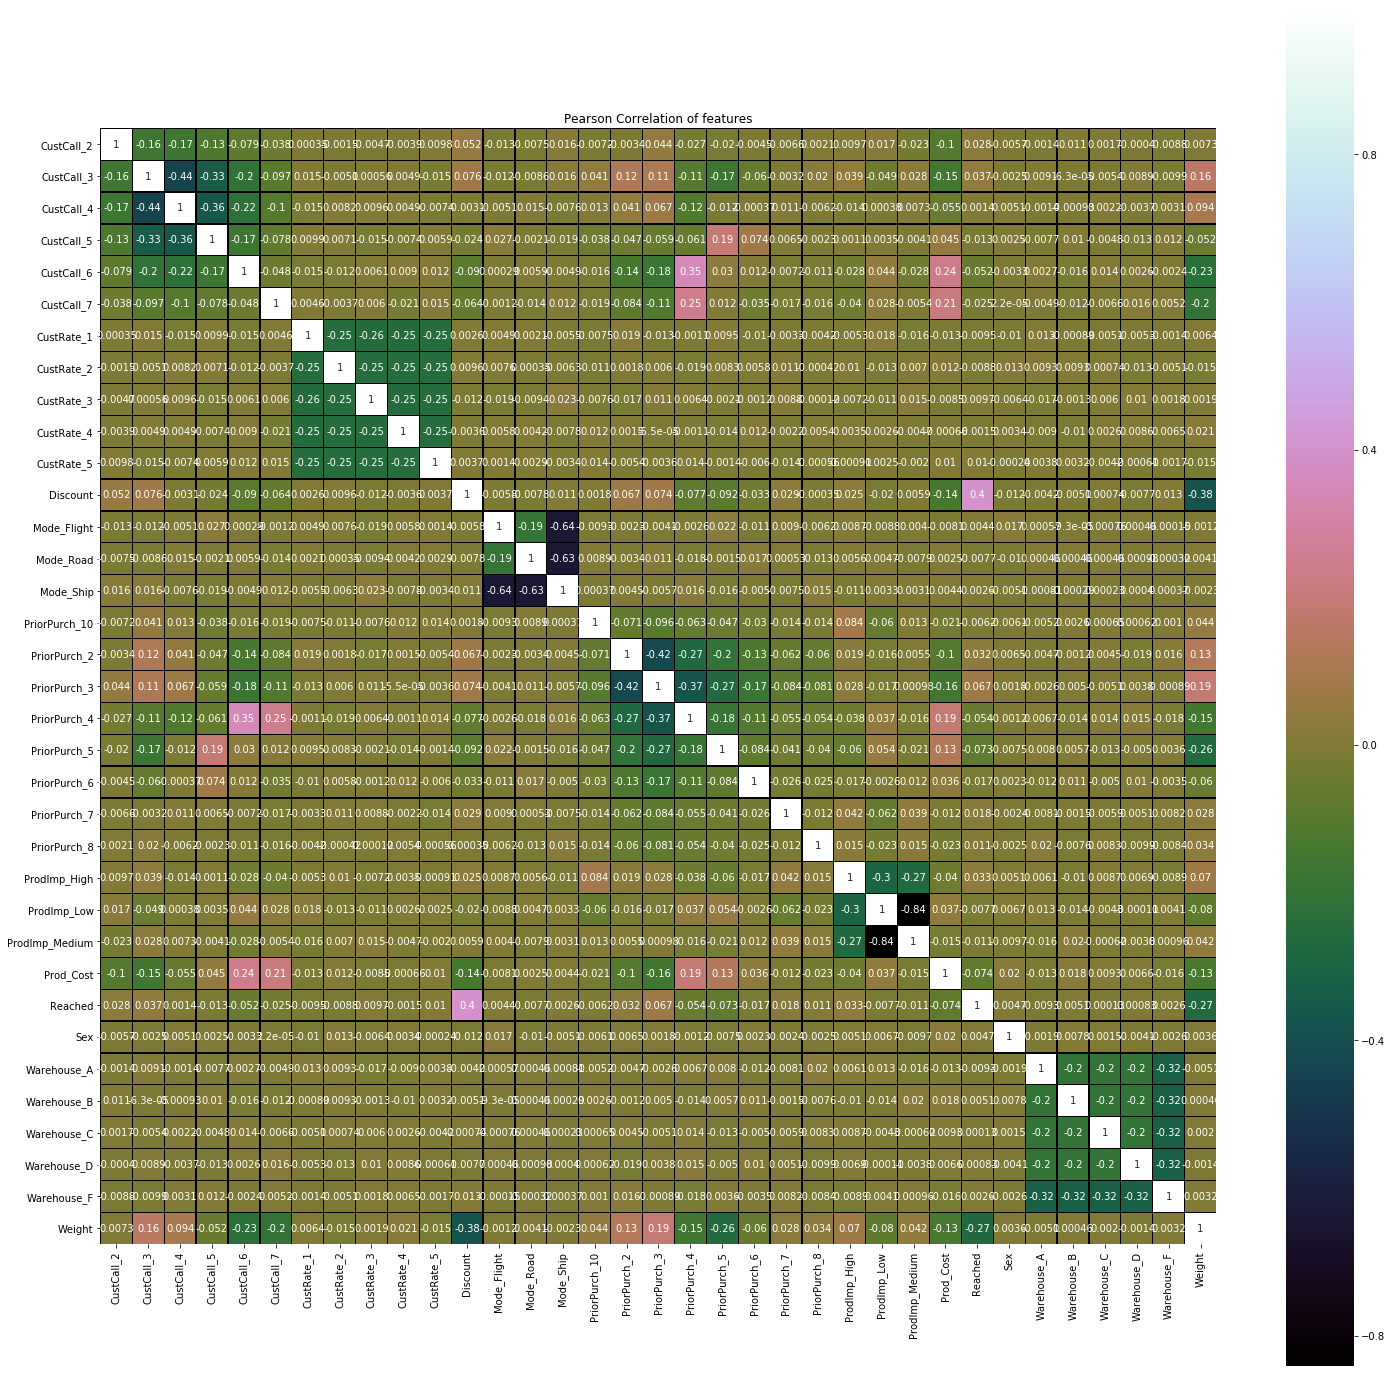

In [99]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df_train.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df_train.columns.difference(str_list) 
# Create Dataframe containing only numerical features
train_num = df_train[num_list]
f, ax = plt.subplots(figsize=(25, 25))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
sns.heatmap(train_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

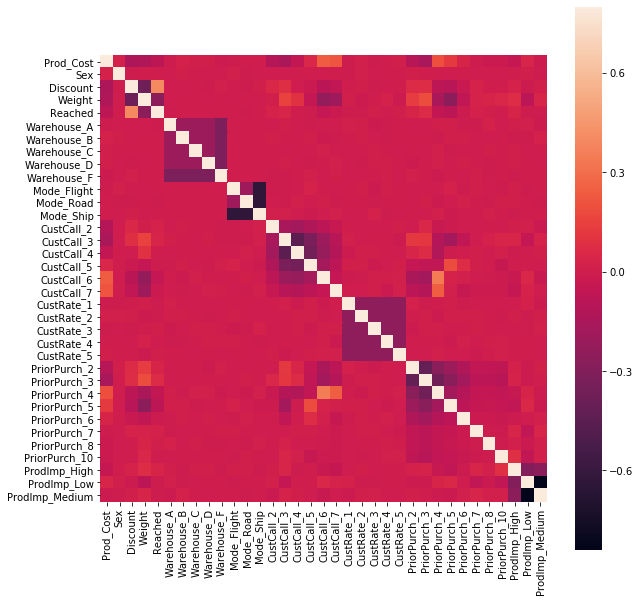

In [100]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, square=True, vmax=.8)

##### Finding the Multi Collinearity among the variable

##### Multi Colinearity
To check for the Mulitcolinearity of the Variables in the Dataset multicollinearity a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy.

Variance Inflation Factor (VIF) is the ratio of variance in a model with multiple terms, divided by the variance of a model with one term alone

In [101]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
df_multi = df_train
df_multi = df_multi.drop('Reached', axis=1)

In [103]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_multi.values, i) for i in range(df_multi.shape[1])]
vif["features"] = df_multi.columns

C:\Users\BLAZIN\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [104]:
vif.round(1)

,VIF Factor,features
0,1.2,Prod_Cost
1,1.0,Sex
2,1.4,Discount
3,1.6,Weight
4,inf,Warehouse_A
5,inf,Warehouse_B
6,inf,Warehouse_C
7,inf,Warehouse_D
8,inf,Warehouse_F
9,inf,Mode_Flight


#### Split the data to train and test

In [105]:
x = df_train
x = x.drop('Reached', axis=1)

In [106]:
x.head()

,Prod_Cost,Sex,Discount,Weight,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Mode_Flight,...,PriorPurch_3,PriorPurch_4,PriorPurch_5,PriorPurch_6,PriorPurch_7,PriorPurch_8,PriorPurch_10,ProdImp_High,ProdImp_Low,ProdImp_Medium
0,177,0,44,1233,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
1,216,1,59,3088,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,183,1,48,3374,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,176,1,10,1177,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,184,0,46,2484,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [107]:
y = df_train[['Reached']]

In [108]:
y.head()

,Reached
0,1
1,1
2,1
3,1
4,1


In [109]:
from sklearn.model_selection import train_test_split

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

## Problem Statement 1

#### As a Data Scientist, they want you to build a model to predict if the shipments are or will reach on time or not.

#### For this, they want you to use various Logit/Probabilistic techniques with the most accurate model. The main models they want you to build and compare the accuracy are:

#### 1. Logistic Regression
#### 2. Support Vector Machines
#### 3. Random Forest
#### 4. XgBoost or any other boosting technique
#### 5. Neural Network.

### Modelling the data

#### 1. Logistic Regression

##### To find the if the product is Reached to the customer using Logistic Regression

##### 
In statistics, the logistic model (or logit model) is a widely used statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. 
In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail, win/lose, alive/dead or healthy/sick; these are represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name. The unit of measurement for the log-odds scale is called a logit, from logistic unit, hence the alternative names. 
Analogous models with a different sigmoid function instead of the logistic function can also be used, such as the probit model; the defining characteristic of the logistic model is that increasing one of the independent variables multiplicatively scales the odds of the given outcome at a constant rate, with each dependent variable having its own parameter; for a binary independent variable this generalizes the odds ratio.

The binary logistic regression model has extensions to more than two levels of the dependent variable: categorical outputs with more than two values are modeled by multinomial logistic regression, and if the multiple categories are ordered, by ordinal logistic regression, for example the proportional odds ordinal logistic model. The model itself simply models probability of output in terms of input, and does not perform statistical classification (it is not a classifier), though it can be used to make a classifier, for instance by choosing a cutoff value and classifying inputs with probability greater than the cutoff as one class, below the cutoff as the other; this is a common way to make a binary classifier. The coefficients are generally not computed by a closed-form expression, unlike linear least squares.

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
logreg = LogisticRegression(random_state=1, fit_intercept=True)

In [113]:
logreg.fit(x_train, np.ravel(y_train))

C:\Users\BLAZIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
y_pred_test = logreg.predict(x_test)

In [115]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.63


##### Confusion Matrix

In [116]:
from sklearn.metrics import confusion_matrix

In [117]:
confusion_matrix(y_test, y_pred_test)

array([[498, 391],
       [426, 885]], dtype=int64)

In [118]:
#Accuracy - Overall, how often is the classifier correct? (TP+TN)/Total
(498 + 885)/(885 + 426 + 391 + 498)

0.6286363636363637

In [119]:
#Misclassification Rate - Overall, how often is it wrong? - Error Rate (FP + FN)/Total
(391 + 426)/(885 + 426 + 391 + 498)

0.37136363636363634

##### ROC Curve

##### Receiver Operating Characteristic(ROC)
ROC Curve to find the threshold Curve
The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. 

In [120]:
from sklearn.metrics import roc_curve

In [121]:
y_pred_train = logreg.predict(x_train)

In [122]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)

In [123]:
#When it's actually no, how often does it predict yes?
fpr[1]

0.4102058077248379

In [124]:
#When it's actually yes, how often does it predict yes - "Sensitivity" or "Recall"
tpr[1]

0.69002284843869

##### AUC - ROC curve 
is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.

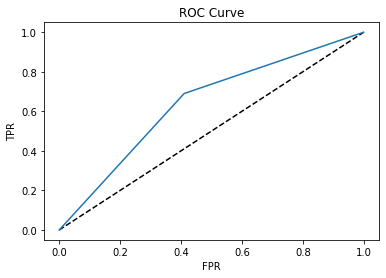

In [125]:
#Plotting
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

##### Fitting the model with the test data

In [126]:
x_tst = df_test
x_tst = x_tst.drop('Reached', axis=1)

In [127]:
df_test['Reached'] = logreg.predict(x_tst)

In [128]:
df_test.head()

,Prod_Cost,Sex,Discount,Weight,Reached,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,...,PriorPurch_3,PriorPurch_4,PriorPurch_5,PriorPurch_6,PriorPurch_7,PriorPurch_8,PriorPurch_10,ProdImp_High,ProdImp_Low,ProdImp_Medium
0,168,1,5,1841,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,159,0,58,1990,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,282,0,42,3193,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,278,1,37,3248,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,256,0,6,3149,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [129]:
df_test.to_csv('Logisitic Regression Prediction.csv')

In [130]:
#Counting no of Product which has reached on the test data with Logistic Regression
df_test['Reached'].value_counts()

1    3848
0     145
Name: Reached, dtype: int64

#### 2. Support Vector Machine

In [131]:
from sklearn.svm import SVC
sv = SVC(kernel='rbf', C=1, gamma='scale')

In [132]:
Support_Vector_Model = sv.fit(x_train, np.ravel(y_train))

In [133]:
Support_Vector_Model

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [134]:
print('Accuracy of Support Vector Machine Classifier on test set: {:.2f}'.format(Support_Vector_Model.score(x_test, y_test)))

Accuracy of Support Vector Machine Classifier on test set: 0.67


In [135]:
y_pred_test = Support_Vector_Model.predict(x_test)

In [136]:
y_pred_test

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

##### Confusion Matrix

In [137]:
from sklearn.metrics import confusion_matrix

In [138]:
confusion_matrix(y_test, y_pred_test)

array([[554, 335],
       [398, 913]], dtype=int64)

In [139]:
#Accuracy - Overall, how often is the classifier correct? (TP+TN)/Total
(913 + 554)/(913 + 398 + 335 + 554)

0.6668181818181819

In [140]:
#Misclassification Rate- Overall, how often is it wrong? - Error Rate (FP + FN)/Total
(398 + 335)/(913 + 398 + 335 + 554)

0.3331818181818182

##### Fitting the model with the test data

In [141]:
x_tst = df_test
x_tst = x_tst.drop('Reached', axis=1)

In [142]:
df_test['Reached'] = Support_Vector_Model.predict(x_tst)

In [143]:
df_test.head()

,Prod_Cost,Sex,Discount,Weight,Reached,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,...,PriorPurch_3,PriorPurch_4,PriorPurch_5,PriorPurch_6,PriorPurch_7,PriorPurch_8,PriorPurch_10,ProdImp_High,ProdImp_Low,ProdImp_Medium
0,168,1,5,1841,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,159,0,58,1990,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,282,0,42,3193,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,278,1,37,3248,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,256,0,6,3149,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [144]:
df_test.to_csv('Support Vector Machine Prediction.csv')

In [145]:
#Counting no of Product which has reached on the test data with Logistic Regression
df_test['Reached'].value_counts()

1    3821
0     172
Name: Reached, dtype: int64

#### *. Decision Tree Classification

In [146]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                           max_depth=None, min_samples_split=2, min_samples_leaf=2,
                           random_state=294, max_leaf_nodes=None
                          )

In [147]:
Decision_Tree_Model = dt.fit(x_train, y_train)

In [148]:
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(Decision_Tree_Model.score(x_test, y_test)))

Accuracy of Decision Tree Classifier on test set: 0.65


In [149]:
Decision_Tree_Model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=294, splitter='best')

In [150]:
y_pred_test = Decision_Tree_Model.predict(x_test)

In [151]:
y_pred_test

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

##### Confusion Matrix

In [152]:
from sklearn.metrics import confusion_matrix

In [153]:
confusion_matrix(y_test, y_pred_test)

array([[520, 369],
       [408, 903]], dtype=int64)

In [154]:
#Accuracy Entropy - Overall, how often is the classifier correct? (TP+TN)/Total
(963 + 457)/(963 + 348 + 432 + 457)

0.6454545454545455

In [155]:
#Misclassification Rate Entropy - Overall, how often is it wrong? - Error Rate (FP + FN)/Total
(348 + 432)/(963 + 348 + 432 + 457)

0.35454545454545455

In [156]:
#Accuracy Gini - Overall, how often is the classifier correct? (TP+TN)/Total
(965 + 435)/(965 + 346 + 454 + 435)

0.6363636363636364

In [157]:
#Misclassification Rate Gini - Overall, how often is it wrong? - Error Rate (FP + FN)/Total
(346 + 454)/(965 + 346 + 454 + 435)

0.36363636363636365

##### Fitting the model with the test data

In [158]:
x_tst = df_test
x_tst = x_tst.drop('Reached', axis=1)

In [159]:
x_tst.head()

,Prod_Cost,Sex,Discount,Weight,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Mode_Flight,...,PriorPurch_3,PriorPurch_4,PriorPurch_5,PriorPurch_6,PriorPurch_7,PriorPurch_8,PriorPurch_10,ProdImp_High,ProdImp_Low,ProdImp_Medium
0,168,1,5,1841,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,159,0,58,1990,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,282,0,42,3193,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,278,1,37,3248,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,256,0,6,3149,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [160]:
df_test['Reached'] = Decision_Tree_Model.predict(x_tst)

In [161]:
df_test.head()

,Prod_Cost,Sex,Discount,Weight,Reached,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,...,PriorPurch_3,PriorPurch_4,PriorPurch_5,PriorPurch_6,PriorPurch_7,PriorPurch_8,PriorPurch_10,ProdImp_High,ProdImp_Low,ProdImp_Medium
0,168,1,5,1841,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,159,0,58,1990,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,282,0,42,3193,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,278,1,37,3248,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,256,0,6,3149,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [162]:
#Counting no of Product which has reached on the test data with Logistic Regression
df_test['Reached'].value_counts()

1    3914
0      79
Name: Reached, dtype: int64

In [164]:
df_test.to_csv('Decision Tree Prediction.csv')

#### 3. Random Forest Classification

In [165]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy', n_estimators=250, max_depth=None, random_state=294, n_jobs=-1)

In [166]:
Random_Forest_Model = rf.fit(x_train, np.ravel(y_train))

In [167]:
Random_Forest_Model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=-1, oob_score=False, random_state=294, verbose=0,
                       warm_start=False)

In [168]:
print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(Random_Forest_Model.score(x_test, y_test)))

Accuracy of Random Forest Classifier on test set: 0.68


In [169]:
y_pred_test = Random_Forest_Model.predict(x_test)

In [170]:
y_pred_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

##### Confusion Matrix

In [171]:
from sklearn.metrics import confusion_matrix

In [172]:
confusion_matrix(y_test, y_pred_test)

array([[629, 260],
       [445, 866]], dtype=int64)

In [173]:
#Accuracy Entropy 250 Trees - Overall, how often is the classifier correct? (TP+TN)/Total
(629 + 866)/(629 + 260 + 445 + 866)

0.6795454545454546

In [174]:
#Misclassification Rate Entropy 250 Trees - Overall, how often is it wrong? - Error Rate (FP + FN)/Total
(260 + 445)/(629 + 260 + 445 + 866)

0.32045454545454544

In [175]:
#Accuracy Gini 150 Trees - Overall, how often is the classifier correct? (TP+TN)/Total
(883 + 602)/(883 + 428 + 287 + 602)

0.675

In [176]:
#Misclassification Rate Gini 150 Trees - Overall, how often is it wrong? - Error Rate (FP + FN)/Total
(428 + 287)/(883 + 428 + 287 + 602)

0.325

##### Fitting the model with the test data

In [177]:
x_tst = df_test
x_tst = x_tst.drop('Reached', axis=1)

In [178]:
df_test['Reached'] = Random_Forest_Model.predict(x_tst)

In [179]:
df_test.head()

,Prod_Cost,Sex,Discount,Weight,Reached,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,...,PriorPurch_3,PriorPurch_4,PriorPurch_5,PriorPurch_6,PriorPurch_7,PriorPurch_8,PriorPurch_10,ProdImp_High,ProdImp_Low,ProdImp_Medium
0,168,1,5,1841,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,159,0,58,1990,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,282,0,42,3193,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,278,1,37,3248,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,256,0,6,3149,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [180]:
df_test.to_csv('Random Forest Prediction.csv')

In [181]:
#Counting no of Product which has reached on the test data with Logistic Regression
df_test['Reached'].value_counts()

1    3972
0      21
Name: Reached, dtype: int64

#### 3. xgBoost Classification

In [182]:
import xgboost as xgb

In [183]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic', booster='gbtree', 
                          gamma=0, learning_rate=0.1, reg_alpha=0, reg_lambda=1,
                          earning_rate=0.1, max_depth=6, n_estimators=250, seed=123, 
                          n_jobs=-1, nthread=None, random_state=500)

In [184]:
# Fit the classifier to the training set
xgboost_model = xg_cl.fit(x_train, np.ravel(y_train))

In [185]:
xgboost_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, earning_rate=0.1, gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
              n_estimators=250, n_jobs=-1, nthread=None,
              objective='binary:logistic', random_state=500, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=123, silent=True,
              subsample=1)

In [186]:
print('Accuracy of xgBoost Classifier on test set: {:.2f}'.format(xgboost_model.score(x_test, y_test)))

Accuracy of xgBoost Classifier on test set: 0.67


In [187]:
y_pred_test = xgboost_model.predict(x_test)

In [188]:
y_pred_test

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

##### Confusion Matrix

In [189]:
from sklearn.metrics import confusion_matrix

In [190]:
confusion_matrix(y_test, y_pred_test)

array([[645, 244],
       [492, 819]], dtype=int64)

In [191]:
#Accuracy - Overall, how often is the classifier correct? (TP+TN)/Total
(750 + 714)/(714 + 175 + 561 + 750)

0.6654545454545454

In [192]:
#Misclassification Rate - Overall, how often is it wrong? - Error Rate (FP + FN)/Total
(561 + 175)/(714 + 175 + 561 + 750)

0.33454545454545453

##### Fitting the model with the test data

In [193]:
x_tst = df_test
x_tst = x_tst.drop('Reached', axis=1)

In [194]:
df_test['Reached'] = xgboost_model.predict(x_tst)

In [195]:
df_test.head()

,Prod_Cost,Sex,Discount,Weight,Reached,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,...,PriorPurch_3,PriorPurch_4,PriorPurch_5,PriorPurch_6,PriorPurch_7,PriorPurch_8,PriorPurch_10,ProdImp_High,ProdImp_Low,ProdImp_Medium
0,168,1,5,1841,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,159,0,58,1990,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,282,0,42,3193,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,278,1,37,3248,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,256,0,6,3149,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [196]:
df_test.to_csv('xgBoost Prediction.csv')

In [197]:
#Counting no of Product which has reached on the test data with Logistic Regression
df_test['Reached'].value_counts()

1    3974
0      19
Name: Reached, dtype: int64

## Problem Statement 3

#### They want you to create a customer segmentation using clustering algorithm of the customers to whom the shipments are not reaching on time.

Hint
Use only delayed customers data for clustering.

In [243]:
pwd

'E:\\IMS Course Content\\Course Content\\Data Science Term 3\\Project'

In [244]:
# Change the path
import os
os.chdir('E:\\IMS Course Content\\Course Content\\Data Science Term 3\\Project')

In [245]:
pwd

'E:\\IMS Course Content\\Course Content\\Data Science Term 3\\Project'

In [246]:
#import numpy and pandas
import numpy as np
import pandas as pd

In [247]:
# Load the Train csv
df_train = pd.read_csv('Customer_Train.csv', index_col=None)

In [248]:
df_train.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [249]:
df_train.shape

(10999, 12)

In [250]:
#Using the customer data for which the orders has not reached on time
df_cluster_train = df_train[df_train['Reached.on.Time_Y.N']==1]

In [251]:
df_cluster_train.shape

(6563, 12)

In [252]:
df_cluster_train.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


#### Create a cluster of the customers segmentation based on the customer care calls and the customer rating

In [263]:
X = df_cluster_train.iloc[:, [3,4]].values

In [264]:
X

array([[4, 2],
       [4, 5],
       [2, 2],
       ...,
       [5, 3],
       [5, 2],
       [4, 1]], dtype=int64)

## K-Mean Algorithm

In [230]:
from sklearn.cluster import KMeans

#### Using the elbow method to find the optimal number of clusters

In [265]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

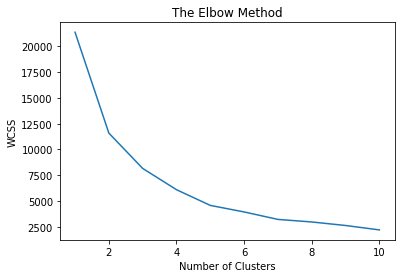

In [266]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [269]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_jobs=-1, random_state=294)
y_kmeans=kmeans.fit_predict(X)

In [284]:
y_kmeans

array([0, 1, 0, ..., 2, 0, 0])

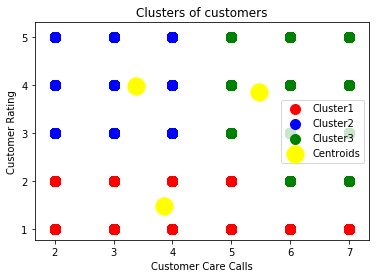

In [272]:
#Visualize the clusters

plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster3')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Customer Care Calls')
plt.ylabel('Customer Rating')
plt.legend()
plt.show()

## Heirarchical Clustering

In [226]:
import scipy
import scipy.cluster.hierarchy as sch

##### Using the dendrogram to find the optimal number of clusters

In [273]:
lnk = linkage(X, method = 'ward')

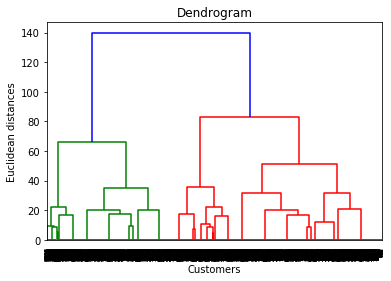

In [275]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [276]:
from sklearn.cluster import AgglomerativeClustering

In [281]:
k=4

hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
y_hc = hc.fit(X)

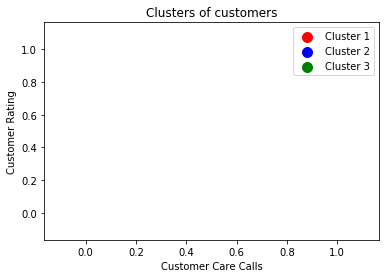

In [283]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Clusters of customers')
plt.xlabel('Customer Care Calls')
plt.ylabel('Customer Rating')
plt.legend()
plt.show()